# Un second algorithme de tri: Le tri par insertion

## Initialisation du notebook

In [11]:
from IPython.display import HTML, display
from IPython.core.magic import register_line_cell_magic
import urllib.parse

@register_line_cell_magic
def tutor(line, cell):
    code = urllib.parse.urlencode({"code": cell})
    display(HTML("""
    <iframe width="800" height="500" frameborder="0"
            src="http://pythontutor.com/iframe-embed.html#%s&py=3">
    </iframe>
    """ % code))

## Exécution de tous les doctests

In [28]:
import doctest
doctest.testmod(verbose=False)

TestResults(failed=0, attempted=36)

## Insertion d'un élément dans un tableau

### Insertion à une position donnée

On dispose d'un tableau d'éléments quelconques. On aimerait insérer un élément à un indice donné, en décallant toutes les valeurs à partir de cet indice d'une unité vers la droite.

Une telle fonction d'insertion existe déjà en python (```t.insert(position)```), mais nous allons en étudier l'algorithme ici. 

Afin de rajouter un élément dans un tableau, on suppose que seule la fonction ```append(valeur)``` est utilisable: celle-ci place évidemment la valeur au *bout* du tableau.

#### Commençons par un exemple

On considère le tableau ```t = [5, 0, 4, 5, 2, 2, 3]```.

Insérer la valeur 8 à la position d'indice 2 du tableau, en n'utilisant que les 2 ingrédients suivants:
- ```append``` pour ajouter un élément à la fin du tableau
- l'échange de deux éléments du tableau
Attention, toutes les valeurs à partir de l'indice 2 doivent être décalées d'une unité vers la droite.

In [15]:
%%tutor
t = [5, 0, 4, 5, 2, 2, 3]

t.append(8)
j = len(t) - 1

while j > 2:
    # On échange les valeurs d'indices j et j - 1
    temp = t[j]
    t[j] = t[j - 1]
    t[j - 1] = temp
    
    j = j - 1

#### Écriture à l'aide de fonctions

Afin de documenter nos fonctions, nous allons non seulement utiliser des **docstrings** (ce que nous faisions depuis longtemps déjà), mais nous allons aussi inclure des **doctests**, qui sont des copies de portions de session interactive utilisant la fonction, et qui pourront être validées automatiquement par le module ```doctest```. Ces petits bouts de code servent à documenter la façon dont la fonction doit être utilisée, mais aussi quel est le résultat attendu.

In [5]:
def échange(tableau, i, j):
    """Échange en place les deux valeurs d'indices i et j dans le tableau.
    
    >>> t = [1, 2, 3, 4, 5]
    >>> échange(t, 1, 3)
    >>> t
    [1, 4, 3, 2, 5]
    
    # Un échange sur le même indice ne produit aucun effet
    >>> échange(t, 4, 4)
    >>> t
    [1, 4, 3, 2, 5]
    
    """
    
    temp = tableau[i]
    tableau[i] = tableau[j]
    tableau[j] = temp

In [16]:
def insère(tableau, indice, valeur):
    """Insère 'valeur' à la position donnée par 'indice'. Toutes les anciennes valeurs
    à partir de cet indice sont décalées vers la droite d'une unité.
    
    Déclenche une erreur si l'indice fourni est en dehors du domaine du tableau,
    excepté s'il s'agit de la dernière position (c'est-à-dire si indice est égal à la longueur
    du tableau). Dans ce dernier cas, on obtiendra le même effet qu'avec append.
    
    >>> t=[4, 2, 7, 4, 9, 8, 1]
    >>> insère(t, 2, 0)
    >>> t
    [4, 2, 0, 7, 4, 9, 8, 1]
    
    >>> t = []
    >>> insère(t, 0, 5)
    >>> t
    [5]
    
    >>> insère(t, 1, 3)
    >>> t
    [5, 3]
    
    
    >>> insère(t, 0, 2)
    >>> t
    [2, 5, 3]
    
    """
    
    i = len(tableau)
    tableau.append(valeur)
    while i > indice:
        échange(tableau, i, i - 1)
        i = i - 1

### Insertion dans un tableau déjà trié

On suppose cette fois que le tableau est déjà trié dans l'ordre croissant. On souhaite insérer un nouvel élément, mais cette fois on ne précise pas la position: celle-ci doit être déterminée automatiquement afin que le tableau final soit encore trié dans l'ordre croissant. Aux cas d'égalités près, il y a une unique position possible pour insérer un élément donné (et en cas d'égalité, toutes les positions possibles aboutiront au même tableau final).

####  Sur un exemple

On considère le tableau ```t = [1, 2, 2, 4, 4, 4, 6, 9]```. Insérer dans ce tableau la valeur 3, en respectant les contraintes suivantes:
- utilisation de ```append``` pour ajouter un élément à la fin du tableau;
- échange de deux éléments du tableau;
- le tableau final doit être trié dans l'ordre croissant.

In [9]:
%%tutor
t = [1, 2, 2, 4, 4, 4, 6, 9]
t.append(3)
i = len(t) - 1
while t[i - 1] > t[i]:
    temp = t[i]
    t[i] = t[i - 1]
    t[i - 1] = temp
    
    i = i - 1

#### À l'aide d'une fonction générale

In [10]:
def insère_déjà_trié(tableau, valeur):
    """Insère 'valeur' dans 'tableau'.
    
    Contraintes:
    - tableau est supposé trié dans l'ordre croissant au départ
    - tableau doit encore être trié dans l'ordre croissant à l'arrivée.
    
    >>> t = [1, 2, 3, 4, 5]
    
    >>> insère_déjà_trié(t, 6)
    >>> t
    [1, 2, 3, 4, 5, 6]
    
    >>> insère_déjà_trié(t, 0)
    >>> t
    [0, 1, 2, 3, 4, 5, 6]
    
    >>> insère_déjà_trié(t, 2.5)
    >>> t
    [0, 1, 2, 2.5, 3, 4, 5, 6]
    
    >>> insère_déjà_trié(t, 4)
    >>> insère_déjà_trié(t, 4)
    >>> t
    [0, 1, 2, 2.5, 3, 4, 4, 4, 5, 6]
    
    """
    
    i = len(tableau)
    tableau.append(valeur)
    while i > 0 and tableau[i-1] > tableau[i]:
        échange(tableau, i, i - 1)
        i = i - 1

## Algorithme de tri par insertion

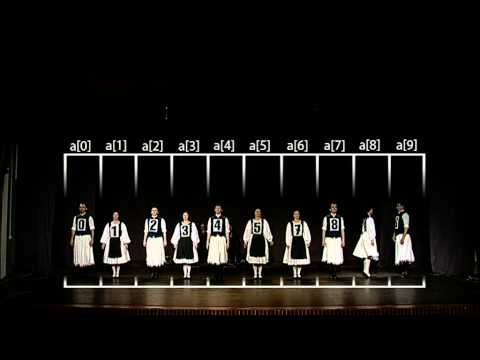

In [12]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('ROalU379l3U')

### Description informelle de l'algorithme

Cet algorithme respecte les contraintes suivantes:
- Tout comme pour l'algorithme de tri par sélection, à tout moment le début du tableau est définitivement trié, la fin restant à trier.
- cet algorithme fonctionne en prenant le premier élément non trié (donc à droite de la partie triée), et en l'insérant dans la partie gauche (déjà triée) en réutilisant l'algorithme vu à la section précédente.
- lorsque le dernier élément a été inséré, le tableau dans sa totalité sera alors trié.

### Sur un exemple

On reprend le tableau de la vidéo: ```t = [3, 0, 1, 8, 7, 2, 5, 4, 9, 6]```. 

In [13]:
%%tutor
t = [3, 0, 1, 8, 7, 2, 5, 4, 9, 6]
for i in range(1, len(t) ):
    j = i
    while j > 0 and t[j-1] > t[j]:
        temp = t[j]
        t[j] = t[j - 1]
        t[j - 1] = temp
        
        j = j - 1

### À l'aide d'une fonction

In [19]:
def tri_insertion(t):
    """Trie le tableau 't' dans l'ordre croissant.
    
    >>> t = [3, 0, 1, 8, 7, 2, 5, 4, 9, 6]
    >>> tri_insertion(t)
    >>> t
    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    """
    
    # On démarre à 1 car le premier élément est déjà trié avec lui-même.
    for i in range(1, len(t) ):
        
        # On va insérer l'élément d'indice i dans la partie plus à gauche du 
        # tableau (qui est déjà triée).
        j = i
        while j > 0 and t[j-1] > t[j]:
            # On échange les éléments d'indices j-1 et j tant qu'ils sont dans 
            # le mauvais ordre
            temp = t[j]
            t[j] = t[j - 1]
            t[j - 1] = temp

            j = j - 1    

### Généralisation de la fonction : ordre du tri et calcul de la clé de tri

In [24]:
def tri_insertion(t, croissant=True, clé_de_tri=None):
    """Trie le tableau 't' dans l'ordre croissant.
    
    Le paramètre optionel 'croissant' est un booléen précisant si l'ordre
    doit se faire selon l'ordre croissant.
    
    Le paramètre optionel 'clé_de_tri' est une fonction permettant de calculer
    pour chaque valeur une clé de tri qui servira pour les comparaisons.
    
    >>> t = [3, 0, 1, 8, 7, 2, 5, 4, 9, 6]
    >>> tri_insertion(t)
    >>> t
    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

    >>> t = [3, 0, 1, 8, 7, 2, 5, 4, 9, 6]
    >>> tri_insertion(t, croissant=False)
    >>> t
    [9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

    """
    
    # On démarre à 1 car le premier élément est déjà trié avec lui-même.
    for i in range(1, len(t) ):
        
        # On va insérer l'élément d'indice i dans la partie plus à gauche du 
        # tableau (qui est déjà triée).
        j = i
        inséré = False
        while j > 0 and inséré is False:
            if clé_de_tri is True:
                avant = clé_de_tri(t[j - 1])
                élément = clé_de_tri(t[j])
            else:
                avant = t[j - 1]
                élément = t[j]
            
            if (croissant is True and avant > élément) or (croissant is False and avant < élément):
                # On échange les éléments d'indices j-1 et j tant qu'ils sont dans 
                # le mauvais ordre
                temp = t[j]
                t[j] = t[j - 1]
                t[j - 1] = temp
            else:
                inséré = True

            j = j - 1


In [27]:
def copie_triée(t, croissant=True, clé_de_tri=None):
    """Rentourne une copie triée du tableau 't'.
    
    Le paramètre optionel 'croissant' est un booléen précisant si l'ordre
    doit se faire selon l'ordre croissant.
    
    Le paramètre optionel 'clé_de_tri' est une fonction permettant de calculer
    pour chaque valeur une clé de tri qui servira pour les comparaisons.
    
    >>> t = [3, 0, 1, 8, 7, 2, 5, 4, 9, 6]
    >>> copie_triée(t)
    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    >>> t
    [3, 0, 1, 8, 7, 2, 5, 4, 9, 6]

    >>> copie_triée(t, croissant=False)
    [9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
    >>> t
    [3, 0, 1, 8, 7, 2, 5, 4, 9, 6]

    """
    copie = [élément for élément in t]
    
    tri_insertion(copie, croissant, clé_de_tri)
    
    return copie